## Load the dataframe

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [4]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


## Load specific rows

In [5]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


## Load specific column

In [7]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [8]:
df["   TG"]

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

## Load multiple columns

In [9]:
df[["STAID", "   TG", " Q_TG" ]]

,STAID,TG,Q_TG
0,1,21,0
1,1,46,0
2,1,31,0
3,1,37,0
4,1,31,0
...,...,...,...
59316,1,-9999,9
59317,1,-9999,9
59318,1,-9999,9
59319,1,-9999,9


## Simple statistics and filtering

In [10]:
df.loc[df["   TG"] !=-9999]["   TG"].mean()/10

6.360787526128467

In [11]:
df.loc[df["   TG"] !=-9999]["   TG"].max()/10

26.2

In [12]:
df.loc[df["   TG"] !=-9999]["   TG"].min()/10

-28.8

<AxesSubplot:>

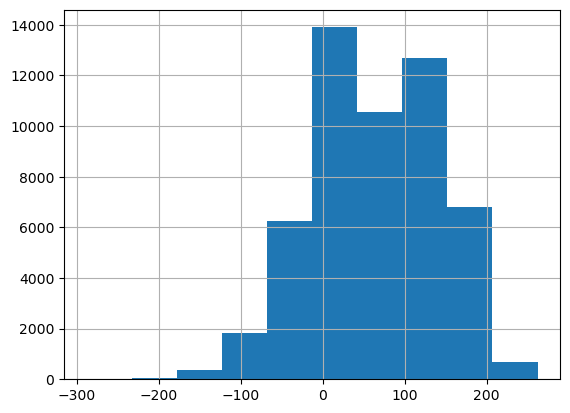

In [13]:
df.loc[df["   TG"] !=-9999]["   TG"].hist()

## Accessing specific values for specific cells

In [14]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# The temp on date 1860-01-05

In [15]:
df.loc[df["    DATE"]=="1860-01-05"]

,STAID,SOUID,DATE,TG,Q_TG
4,1,35381,1860-01-05,31,0


In [16]:
df.loc[df["    DATE"]=="1860-01-05"]["   TG"].squeeze()/10

3.1

## The hottest day

In [17]:
df.loc[df["   TG"] == df["   TG"].max()]["    DATE"].squeeze()

Timestamp('1868-08-16 00:00:00')

## Querying by co-ordinate

In [18]:
df.loc[3, "   TG"]

37

In [19]:
df.loc[4, "    DATE"]

Timestamp('1860-01-05 00:00:00')

# Adding new columns and modifying the table

## Modifying "  TG" to "0TG": This modification replaced -9999 with NaN

In [20]:
import numpy as np

In [21]:
df["0TG"] = df["   TG"].mask(df["   TG"]==-9999, np.nan)

In [22]:
df

,STAID,SOUID,DATE,TG,Q_TG,0TG
0,1,35381,1860-01-01,21,0,21.0
1,1,35381,1860-01-02,46,0,46.0
2,1,35381,1860-01-03,31,0,31.0
3,1,35381,1860-01-04,37,0,37.0
4,1,35381,1860-01-05,31,0,31.0
...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN
59317,1,35381,2022-05-28,-9999,9,NaN
59318,1,35381,2022-05-29,-9999,9,NaN
59319,1,35381,2022-05-30,-9999,9,NaN


## Modifying "0TG" to "TG": Each row in "0TG" got divided by 10 to reflect the true temp

In [23]:
df["TG"] = df["0TG"]/10

In [24]:
df

,STAID,SOUID,DATE,TG,Q_TG,0TG,TG
0,1,35381,1860-01-01,21,0,21.0,2.1
1,1,35381,1860-01-02,46,0,46.0,4.6
2,1,35381,1860-01-03,31,0,31.0,3.1
3,1,35381,1860-01-04,37,0,37.0,3.7
4,1,35381,1860-01-05,31,0,31.0,3.1
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN


## Converting and adding a fahrenheit column as F

In [25]:
df["F"] = df["TG"]* (9/5) + 32

In [26]:
df

,STAID,SOUID,DATE,TG,Q_TG,0TG,TG,F
0,1,35381,1860-01-01,21,0,21.0,2.1,35.78
1,1,35381,1860-01-02,46,0,46.0,4.6,40.28
2,1,35381,1860-01-03,31,0,31.0,3.1,37.58
3,1,35381,1860-01-04,37,0,37.0,3.7,38.66
4,1,35381,1860-01-05,31,0,31.0,3.1,37.58
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


## Plotting temp variation with time

<AxesSubplot:xlabel='    DATE'>

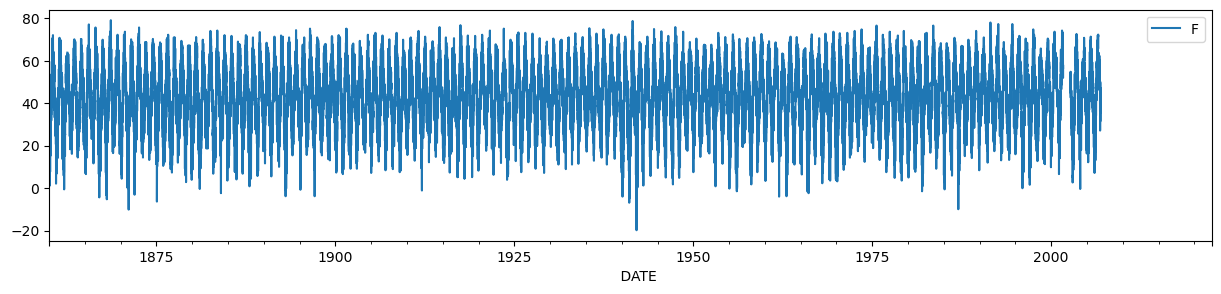

In [27]:
df.plot(x="    DATE", y="F", figsize=(15, 3))

## Plotting a range of rows to get a clearer picture

<AxesSubplot:xlabel='    DATE'>

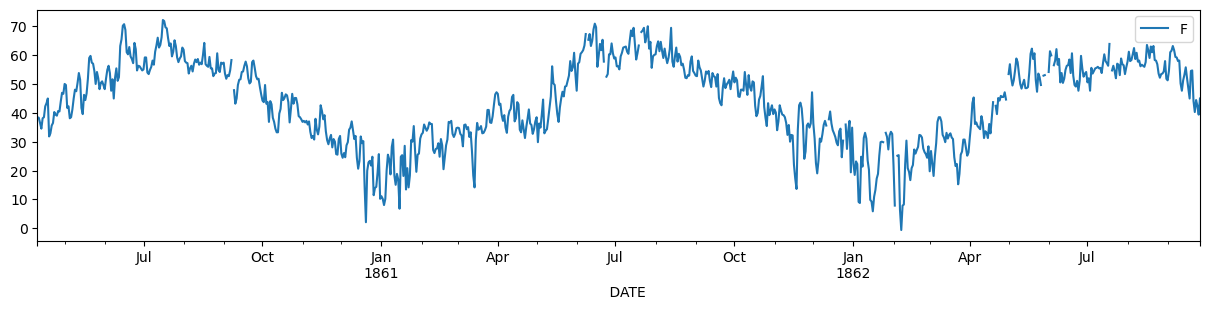

In [28]:
df[100:1000].plot(x="    DATE", y="F", figsize=(15, 3))